All the information from Python tutorial 1 and 2 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

Coding Exercise 1: Defining parameters
We start by defining and initializing the main simulation variables for our LIF neuron.

In the code cell below, please modify the code to print the simulation parameters.

In [ ]:
#defining variables for simulation

t_max = 150e-3   # second
dt = 1e-3        # second delta t
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


The equation needed to simulate input current

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>I</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>I</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>m</mi>
      <mi>e</mi>
      <mi>a</mi>
      <mi>n</mi>
    </mrow>
  </msub>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mn>1</mn>
    <mo>+</mo>
    <mi>sin</mi>
    <mo data-mjx-texclass="NONE">&#x2061;</mo>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <mfrac>
        <mrow>
          <mn>2</mn>
          <mi>&#x3C0;</mi>
        </mrow>
        <mn>0.01</mn>
      </mfrac>
      <mstyle scriptlevel="0">
        <mspace width="0.167em"></mspace>
      </mstyle>
      <mi>t</mi>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>

In [6]:
# Loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin(((2*np.pi) / 0.01) * t))

  # Print value of i
  print(i)

2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688166e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


Repeat the loop from the previous exercise and print the t values with three decimal points, and synaptic input with four decimal points in exponential notation.

In [ ]:
# Initialize step_end
step_end = 10

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Print value of t and i
  print(f'{t:.3f} {i:.4e}') # printing next to each other


0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>V</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo>+</mo>
  <mi mathvariant="normal">&#x394;</mi>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>V</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mfrac>
    <mrow>
      <mi mathvariant="normal">&#x394;</mi>
      <mi>t</mi>
    </mrow>
    <msub>
      <mi>&#x3C4;</mi>
      <mi>m</mi>
    </msub>
  </mfrac>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <msub>
      <mi>E</mi>
      <mi>L</mi>
    </msub>
    <mo>&#x2212;</mo>
    <mi>V</mi>
    <mo stretchy="false">(</mo>
    <mi>t</mi>
    <mo stretchy="false">)</mo>
    <mo>+</mo>
    <mi>R</mi>
    <mi>I</mi>
    <mo stretchy="false">(</mo>
    <mi>t</mi>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>

In [12]:
#################################################
## TODO for students: fill out compute v code ##
# Fill out code and comment or remove the next line
#################################################

# Initialize step_end and v0
step_end = 10
v = el

# Loop for step_end steps
for step in range(step_end):
  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + (dt/tau) * (el - v + r*i)

  # Print value of t and v
  print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


Plotting Current

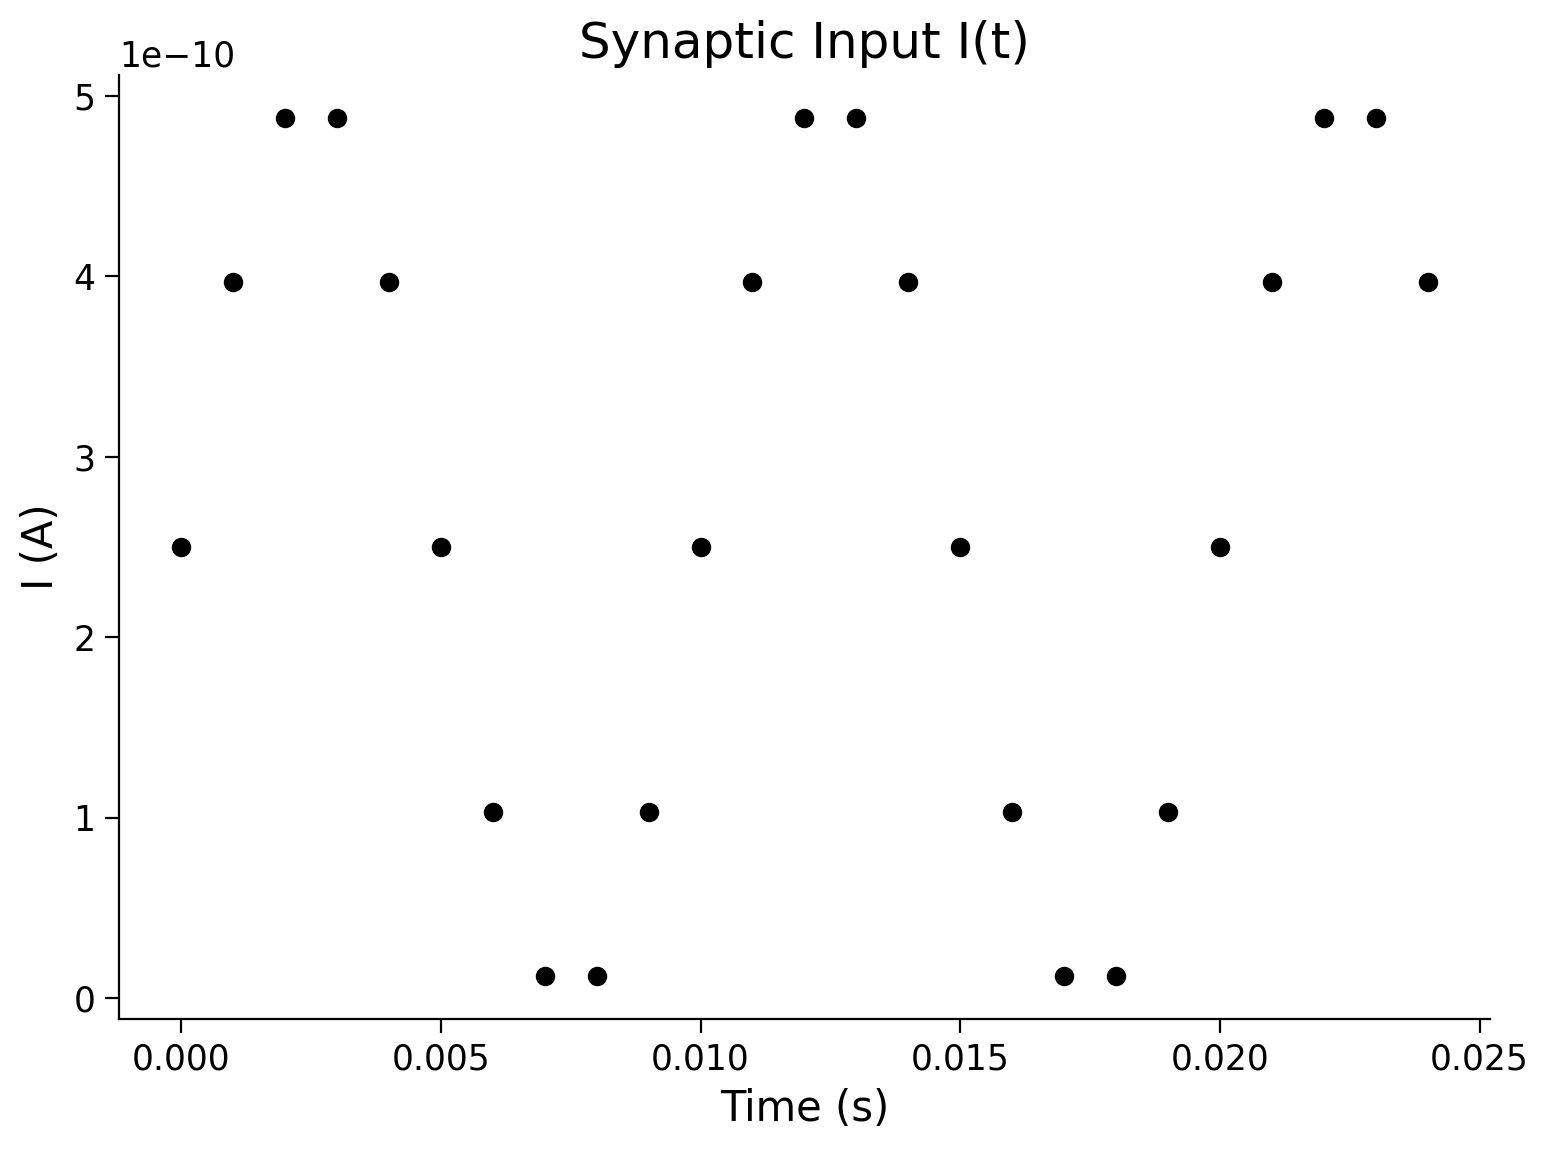

In [16]:
#################################################
## TODO for students: fill out the figure initialization and plotting code below ##
#################################################

# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title('Synaptic Input I(t)')
plt.xlabel('Time (s)')
plt.ylabel('I (A)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt #x

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01)) #y

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i, 'ko')

# Display the plot
plt.show()

Plotting membrane potential

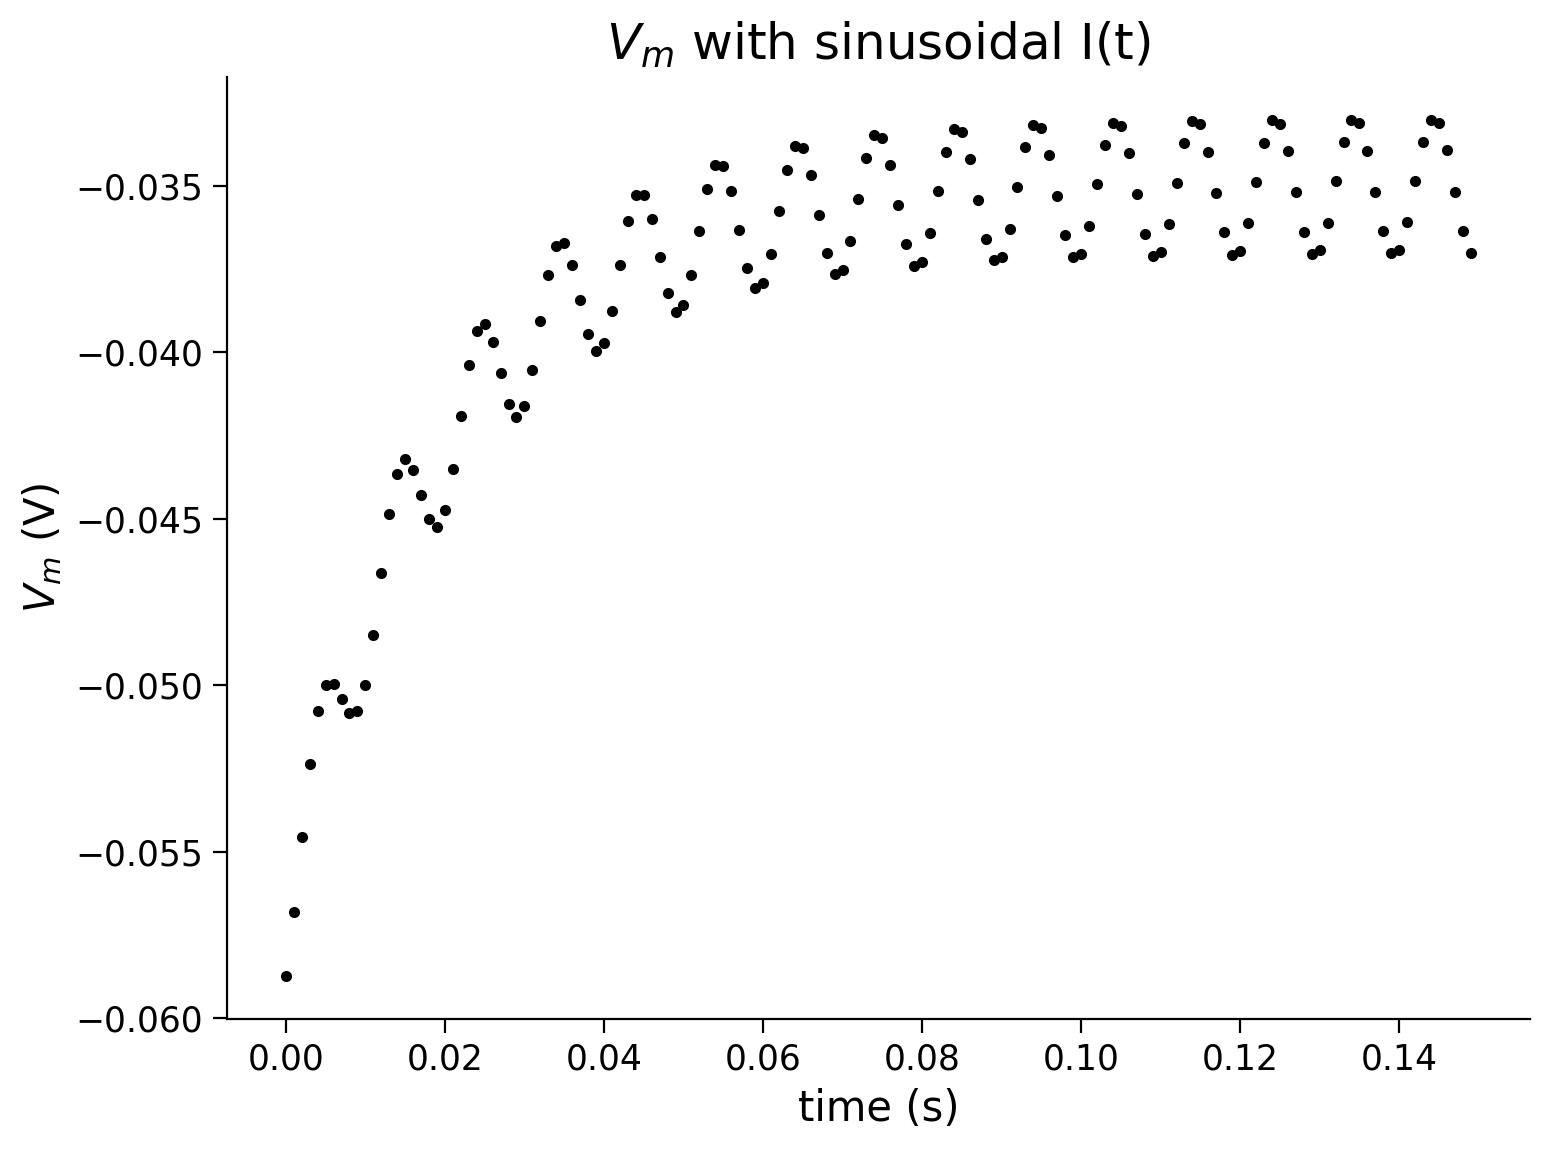

In [20]:
#################################################
## TODO for students: fill out the figure initialization and plotting code below ##
# Fill out code and comment or remove the next line
#################################################

# Initialize step_end
step_end = int(t_max / dt)

# Initialize v0
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)');

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k. ')

# Display plot
plt.show()

Adding Randomness

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>I</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>I</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>m</mi>
      <mi>e</mi>
      <mi>a</mi>
      <mi>n</mi>
    </mrow>
  </msub>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mn>1</mn>
    <mo>+</mo>
    <mn>0.1</mn>
    <msqrt>
      <mfrac>
        <msub>
          <mi>t</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>m</mi>
            <mi>a</mi>
            <mi>x</mi>
          </mrow>
        </msub>
        <mrow>
          <mi mathvariant="normal">&#x394;</mi>
          <mi>t</mi>
        </mrow>
      </mfrac>
    </msqrt>
    <mstyle scriptlevel="0">
      <mspace width="0.167em"></mspace>
    </mstyle>
    <mi>&#x3BE;</mi>
    <mo stretchy="false">(</mo>
    <mi>t</mi>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
  <mstyle scriptlevel="0">
    <mspace width="2em"></mspace>
  </mstyle>
  <mtext>with&#xA0;</mtext>
  <mi>&#x3BE;</mi>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>&#x223C;</mo>
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">U</mi>
  </mrow>
  <mo stretchy="false">(</mo>
  <mo>&#x2212;</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math>

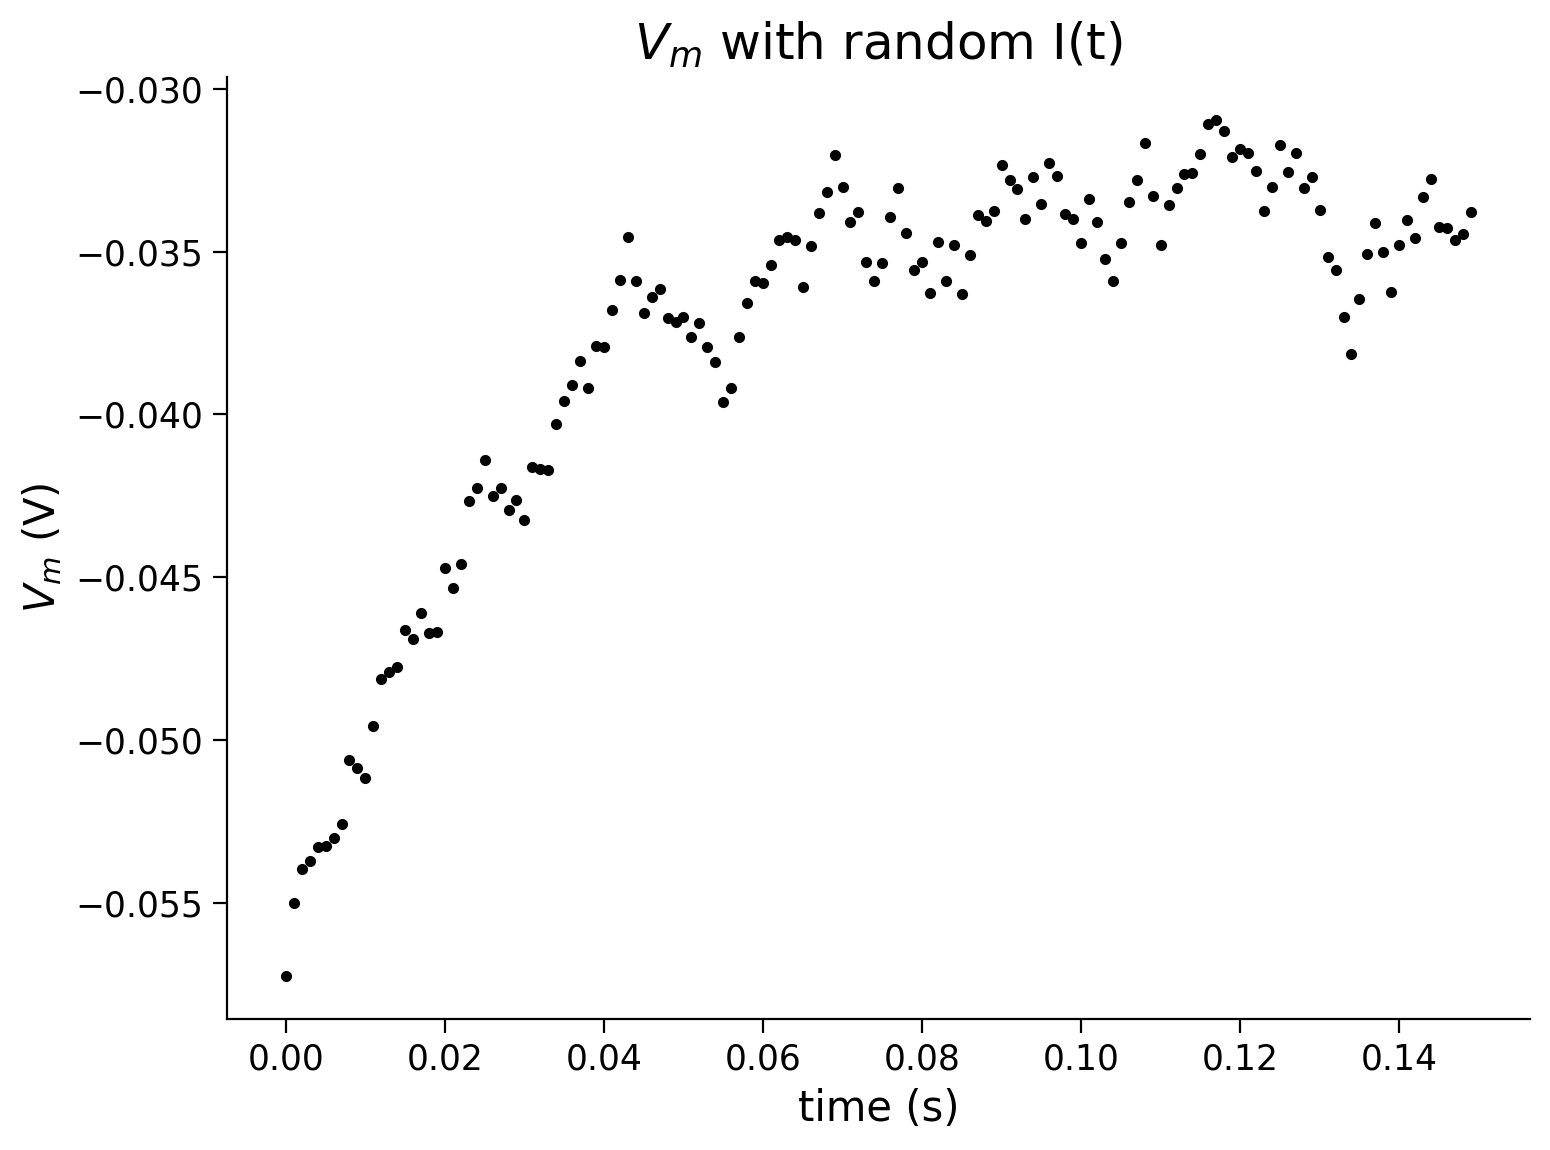

In [31]:
#################################################
## TODO for students: fill out code to get random input ##
# Fill out code and comment or remove the next line
#raise NotImplementedError("Student exercise: You need to fill out random input code")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and v
step_end = int(t_max / dt)
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Get random number in correct range of -1 to 1 (will need to adjust output of np.random.random)
  random_num = 2 * np.random.random() - 1

  # Compute value of i at this time step
  i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * random_num)

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')


# Display plot
plt.show()